## Asheville Airbnb analysis

*This notebook consists of analysis of airbnb data of Asheville, which consists of facilities available in properties being rented in airbnb.* 

*We are going to analyse it and find some insights in it.*

In [1]:
#importing required libraries

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [3]:
#importing data

In [4]:
calendar = pd.read_csv("calendar_.csv")

listings_full = pd.read_csv("listings_.csv")

In [5]:
#questions

### Business understanding.

*This is data of Airbnb in Asheville, North Carolina, United States. With this data we can find insights into rooms, their type and other*

*information like host listings.*

*This data consists of facilities, price and review scores from users in Asheville, North Carolina, United States.*

### Questions for which we would find answers are as below. 

`1. When does price goes high and when it becomes low ? , from this answer, we can know which month it costs more and also in `

`which month it costs less.`

`2. Does instant bookable feature impact price ? , from this answer we find how price varies with and without this feature.`

`3. Which room type costs more ? , from this answer we can know which type of room costs more.`

In [6]:
#Analysis

## Calendar data analysis

1. Removing unnecessary features

2. Converting types

3. Transforming values

4. Checking for null values

5. Outlier detection

In [7]:
calendar.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,8085716,2020-12-20,f,$41.00,$41.00,2,1125
1,8085716,2020-12-21,f,$41.00,$41.00,2,1125


In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824170 entries, 0 to 824169
Data columns (total 7 columns):
listing_id        824170 non-null int64
date              824170 non-null object
available         824170 non-null object
price             824170 non-null object
adjusted_price    824170 non-null object
minimum_nights    824170 non-null int64
maximum_nights    824170 non-null int64
dtypes: int64(3), object(4)
memory usage: 44.0+ MB


In [9]:
#Data understanding of calendar and listings data

## Data understanding

*For calendar data, what we got are listing_id (which is not necessary for our analysis), date (which is booking data) in object type,*

*available feature (which is availablility of room) in object type, price (which is price of room) in object type, adjusted_price in object type,*

*minimum_nights in integer type, maximum_nights in integer type.*

In [10]:
#Preparing data

## Preparing Calendar data

In [11]:
#here listing_id is not necessary,

#date should be converted to datetime type,

#price and adjusted_price must be cleaned and converted to float type,

#available faeture must be label encoded to convert it to numerical type,

#null values must be checked,

#outliers must be checked.

In [12]:
#removing listing_id

calendar.drop('listing_id', axis = 1, inplace = True)

In [13]:
#checking for null values

calendar.isnull().sum()

date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [14]:
#there is no null value in calendat data

In [15]:
#checking for outliers

Q1 = calendar.quantile(0.25)

Q3 = calendar.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

minimum_nights      2.0
maximum_nights    760.0
dtype: float64


In [16]:
calendar.shape

(824170, 6)

In [17]:
#removing outliers

calendar_data = calendar[~((calendar < (Q1 - 1.5 * IQR)) |(calendar > (Q3 + 1.5 * IQR))).any(axis=1)]

calendar_data.shape

(735824, 6)

In [18]:
#nearly 90,000 outliers removed

In [19]:
#taking 10000 rows since data is big

In [20]:
calendar_full = calendar_data[:10000]

In [21]:
calendar_full.shape

(10000, 6)

In [22]:
calendar_full.head(2)

,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2020-12-20,f,$41.00,$41.00,2,1125
1,2020-12-21,f,$41.00,$41.00,2,1125


In [23]:
#so far removed unnecessary feature, no null values and outliers removed

date column which is mentioned as object type should be converted to date type

price and adjusted_price must be cleaned and converted to float

In [24]:
#changing type of date feature

calendar["date"] = pd.to_datetime(calendar["date"])

calendar_full["date"] = pd.to_datetime(calendar_full["date"])

In [25]:
calendar_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 13284
Data columns (total 6 columns):
date              10000 non-null datetime64[ns]
available         10000 non-null object
price             10000 non-null object
adjusted_price    10000 non-null object
minimum_nights    10000 non-null int64
maximum_nights    10000 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 546.9+ KB


In [26]:
#cleaning price and adjusted_price features

calendar_full["price"] = calendar_full["price"].str.replace("$","")

calendar_full["price"] = calendar_full["price"].str.replace(",","")

calendar_full["adjusted_price"] = calendar_full["adjusted_price"].str.replace("$","")

calendar_full["adjusted_price"] = calendar_full["adjusted_price"].str.replace(",","")

In [27]:
#converting price and adjusting_price to float type

calendar_full["price"] = calendar_full["price"].astype("float")

calendar_full["adjusted_price"] = calendar_full["adjusted_price"].astype("float")

In [28]:
calendar_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 13284
Data columns (total 6 columns):
date              10000 non-null datetime64[ns]
available         10000 non-null object
price             10000 non-null float64
adjusted_price    10000 non-null float64
minimum_nights    10000 non-null int64
maximum_nights    10000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 546.9+ KB


In [29]:
#create new columns month and day

In [30]:
calendar_full["month"] = calendar_full["date"].dt.month

calendar_full["day"] = calendar_full["date"].dt.day

In [31]:
calendar_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 13284
Data columns (total 8 columns):
date              10000 non-null datetime64[ns]
available         10000 non-null object
price             10000 non-null float64
adjusted_price    10000 non-null float64
minimum_nights    10000 non-null int64
maximum_nights    10000 non-null int64
month             10000 non-null int64
day               10000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 703.1+ KB


In [32]:
calendar_full.available.value_counts()

t    7548
f    2452
Name: available, dtype: int64

In [33]:
#label encoding available feature

enc = {"available" : { "t" : 0, "f" : 1}}

calendar_full = calendar_full.replace(enc)

calendar_full.available.value_counts()

0    7548
1    2452
Name: available, dtype: int64

In [34]:
calendar_full.describe()

,available,price,adjusted_price,minimum_nights,maximum_nights,month,day
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.245200,139.139600,139.126400,1.834900,809.054300,6.479000,15.724800
std,0.430227,99.848215,99.838316,0.930445,486.667314,3.477063,8.799955
min,0.000000,29.000000,29.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,76.000000,76.000000,1.000000,90.000000,3.000000,8.000000
50%,0.000000,103.000000,103.000000,2.000000,1125.000000,6.000000,16.000000
75%,0.000000,165.000000,165.000000,2.000000,1125.000000,10.000000,23.000000
max,1.000000,523.000000,523.000000,5.000000,1125.000000,12.000000,31.000000


In [35]:
#checking for null values again

calendar_full.isnull().sum()

date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
month             0
day               0
dtype: int64

In [36]:
calendar_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 13284
Data columns (total 8 columns):
date              10000 non-null datetime64[ns]
available         10000 non-null int64
price             10000 non-null float64
adjusted_price    10000 non-null float64
minimum_nights    10000 non-null int64
maximum_nights    10000 non-null int64
month             10000 non-null int64
day               10000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 703.1 KB


In [37]:
#no null values, outliers removed and all are numerical

## Question 1. When does price goes high and when it becomes low ?

In [38]:
#lets see which month price goes high and low

In [39]:
calendar_full.head(2)

,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,day
0,2020-12-20,1,41.0,41.0,2,1125,12,20
1,2020-12-21,1,41.0,41.0,2,1125,12,21


In [40]:
price_date = calendar_full.groupby(calendar_full['date'].dt.strftime('%B'))['price'].mean()

price_date = price_date.sort_values(ascending = False)

price_date = price_date.to_frame()

price_date.reset_index(level= price_date.index.names, inplace=True)

In [41]:
price_date

,date,price
0,November,149.767901
1,October,147.675030
2,December,146.197445
3,July,141.513740
4,June,140.995062
5,August,140.277180
6,September,140.098765
7,May,139.087216
8,April,136.804938
9,March,132.297041


In [42]:
#Answer 1

*Answer 1. We can see price is high from october to December and low from january to april*

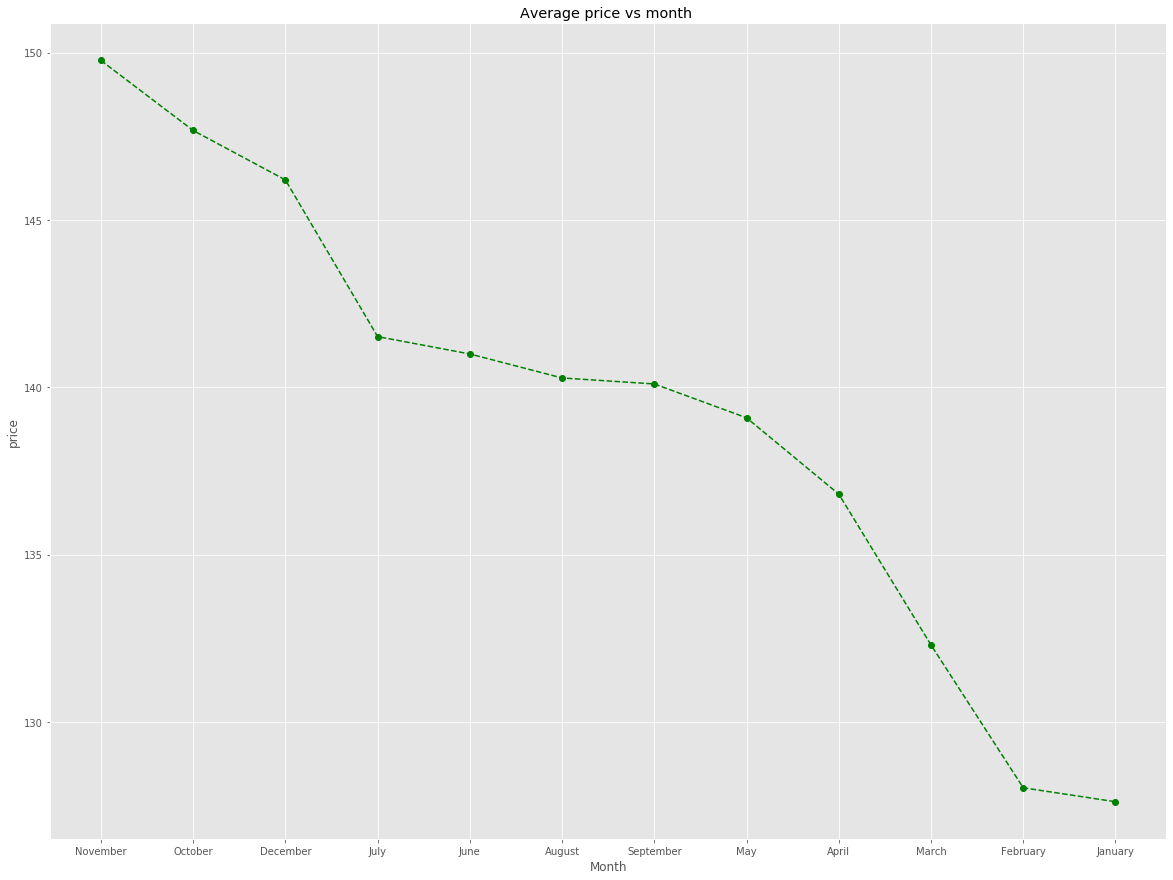

In [43]:
fig, ax = plt.subplots(figsize = (20,15))

ax.plot(price_date["date"], price_date["price"], marker = 'o', linestyle = '--', color = 'g')

ax.set_xlabel("Month")

ax.set_ylabel("price")

ax.set_title("Average price vs month ")

plt.show()

Text(0.5, 1.0, 'Mean price vs month')

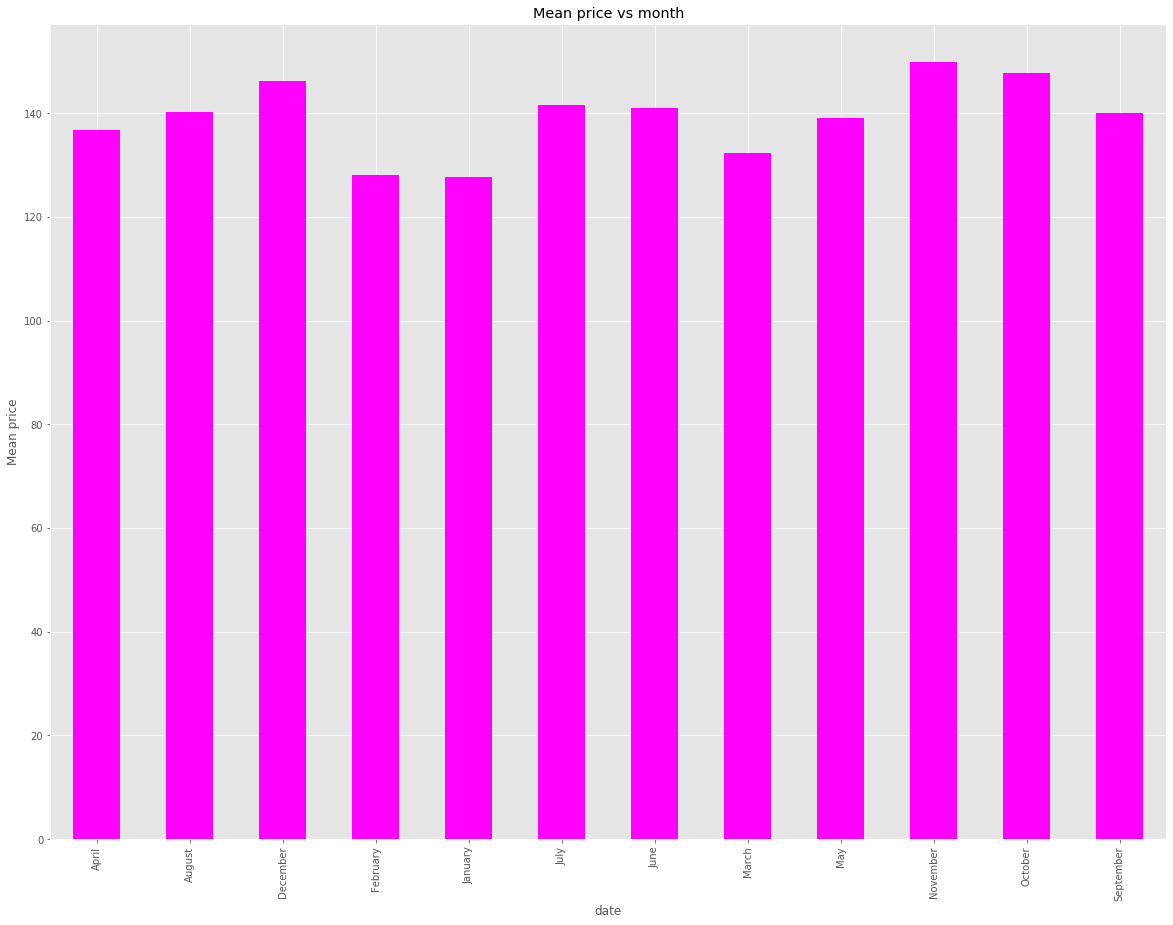

In [44]:
price_date_series = calendar_full.groupby(calendar_full['date'].dt.strftime('%B'))['price'].mean()

ax2 = price_date_series.plot(kind = 'bar', figsize = (20,15), colormap = "spring")

ax2.set_ylabel("Mean price")

ax2.set_title("Mean price vs month")

In [45]:
#listing data

## Listing datasets analysis

In [46]:
listings_full.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,20201220165607,2020-12-20,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.79
1,155305,https://www.airbnb.com/rooms/155305,20201220165607,2020-12-20,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,...,10.0,10.0,10.0,NaN,t,6,1,1,4,2.44


In [47]:
listings_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 74 columns):
id                                              2258 non-null int64
listing_url                                     2258 non-null object
scrape_id                                       2258 non-null int64
last_scraped                                    2258 non-null object
name                                            2258 non-null object
description                                     2254 non-null object
neighborhood_overview                           1817 non-null object
picture_url                                     2258 non-null object
host_id                                         2258 non-null int64
host_url                                        2258 non-null object
host_name                                       2257 non-null object
host_since                                      2257 non-null object
host_location                                   2255 non-null object

In [48]:
listings_full.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.258000e+03,2.258000e+03,2.258000e+03,2257.000000,2257.000000,2258.000000,0.0,2258.000000,2258.000000,2258.000000,...,2045.000000,2045.000000,2045.000000,2045.000000,0.0,2258.000000,2258.000000,2258.000000,2258.000000,2083.00000
mean,2.835357e+07,2.020122e+13,1.019268e+08,75.147098,75.147098,28793.913640,NaN,35.577524,-82.556568,4.239150,...,9.964303,9.943765,9.922738,9.731540,NaN,6.506643,5.671391,0.766608,0.015500,2.92688
std,1.307309e+07,0.000000e+00,9.707193e+07,453.421272,453.421272,28.535997,NaN,0.047461,0.046156,2.773606,...,0.217163,0.283717,0.288217,0.528825,NaN,13.600288,13.174306,2.524668,0.225194,2.28876
min,1.080610e+05,2.020122e+13,4.785900e+04,0.000000,0.000000,28704.000000,NaN,35.423420,-82.672870,1.000000,...,7.000000,6.000000,7.000000,4.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.01000
25%,1.890829e+07,2.020122e+13,1.670082e+07,1.000000,1.000000,28801.000000,NaN,35.563857,-82.588305,2.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.16000
50%,2.967947e+07,2.020122e+13,7.071439e+07,2.000000,2.000000,28804.000000,NaN,35.588955,-82.556335,4.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,2.43000
75%,3.961068e+07,2.020122e+13,1.671862e+08,4.000000,4.000000,28806.000000,NaN,35.605280,-82.525453,6.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,4.000000,3.000000,0.000000,0.000000,4.14000
max,4.709619e+07,2.020122e+13,3.804824e+08,3450.000000,3450.000000,28806.000000,NaN,35.655390,-82.459420,16.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,68.000000,68.000000,17.000000,4.000000,13.67000


In [49]:
listings_full.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [50]:
#here we have lot of features (74) in which we get object type, integer type and float type data.

## Listing data preparation

In [51]:
#checking for null values

listings_full.isnull().sum().any()

True

In [52]:
num_cols = [col for col in listings_full.columns if listings_full[col].dtypes in ['int64','float64']]

In [53]:
cat_cols = [col for col in listings_full.columns if listings_full[col].dtypes == 'object']

In [54]:
num_cols

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per

In [55]:
cat_cols

['listing_url',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'price',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'instant_bookable']

In [56]:
#droping unnecessary features

col_drop =['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',        
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',        
 'reviews_per_month',        
 'listing_url',
 'last_scraped',
 'name',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',        
 'host_thumbnail_url',
 'host_picture_url',       
 'host_has_profile_pic',       
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description',
 'neighborhood_overview',
 'host_verifications',
 'property_type',       
 'amenities',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'license']

listings_full.drop(col_drop, axis =1, inplace = True)

In [57]:
num_cols = [col for col in listings_full.columns if listings_full[col].dtypes in ['int64','float64']]

cat_cols = [col for col in listings_full.columns if listings_full[col].dtypes == 'object']

In [58]:
num_cols

['neighbourhood_cleansed',
 'accommodates',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_value']

In [59]:
listings_full[num_cols].head(2)

,neighbourhood_cleansed,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_value
0,28801,2,1.0,1.0,30,365,0,0,0,173,89,9.0
1,28806,2,1.0,1.0,1,31,24,54,84,352,279,10.0


In [60]:
cat_cols

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_identity_verified',
 'neighbourhood',
 'room_type',
 'bathrooms_text',
 'price',
 'has_availability',
 'instant_bookable']

In [61]:
listings_full[cat_cols].head(2)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_identity_verified,neighbourhood,room_type,bathrooms_text,price,has_availability,instant_bookable
0,within a day,90%,25%,f,NaN,t,"Asheville, North Carolina, United States",Entire home/apt,1 bath,$82.00,t,f
1,within an hour,100%,100%,t,NaN,t,"Asheville, North Carolina, United States",Entire home/apt,1 bath,$90.00,t,t


In [62]:
listings_full.isnull().sum().any()

True

In [63]:
#handling null values

In [64]:
for col in cat_cols:
    
    listings_full[col] = listings_full[col].fillna(listings_full[col].mode()[0])

In [65]:
for col in num_cols:
    
    listings_full[col] = listings_full[col].fillna(listings_full[col].mean())

In [66]:
listings_full.isnull().sum().any()

False

In [67]:
listings_full.shape

(2258, 24)

In [68]:
listings_full.head(2)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_identity_verified,neighbourhood,neighbourhood_cleansed,room_type,accommodates,...,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_value,instant_bookable
0,within a day,90%,25%,f,South Slope Brewing District,t,"Asheville, North Carolina, United States",28801,Entire home/apt,2,...,30,365,t,0,0,0,173,89,9.0,f
1,within an hour,100%,100%,t,South Slope Brewing District,t,"Asheville, North Carolina, United States",28806,Entire home/apt,2,...,1,31,t,24,54,84,352,279,10.0,t


In [69]:
for col in listings_full.columns:
    
    print(col)
    
    print(listings_full[col].value_counts())
    
    print("_"*70)

host_response_time
within an hour        1945
within a few hours     185
within a day           110
a few days or more      18
Name: host_response_time, dtype: int64
______________________________________________________________________
host_response_rate
100%    2060
97%       41
90%       40
0%        13
95%       11
80%        9
98%        8
70%        7
88%        6
86%        6
93%        6
96%        5
50%        5
83%        5
60%        4
75%        4
62%        4
89%        4
94%        3
67%        3
92%        3
91%        2
11%        2
73%        2
33%        1
38%        1
64%        1
63%        1
78%        1
Name: host_response_rate, dtype: int64
______________________________________________________________________
host_acceptance_rate
100%    1141
99%      283
98%      164
97%      100
96%       60
95%       51
94%       45
93%       33
88%       29
86%       28
92%       26
90%       25
91%       24
89%       20
83%       20
0%        19
77%       18
85%       16
50

In [70]:
#cleaning price features

listings_full["price"] = listings_full["price"].str.replace("$","")

listings_full["price"] = listings_full["price"].str.replace(",","")

listings_full["price"] = listings_full["price"].astype("float64")

In [71]:
#Question 2

## Question 2. Does instant bookable feature impact price ?

In [72]:
inst_price = listings_full.groupby(listings_full['instant_bookable'])['price'].mean()

In [73]:
inst_price

instant_bookable
f    145.093612
t    191.096296
Name: price, dtype: float64

In [74]:
#Answer 2

*Answer 2. Price is high for rooms which is instant bookable with significant difference with rooms which is not instant bookable.*

Text(0.5, 1.0, 'Instant bookable feature vs price')

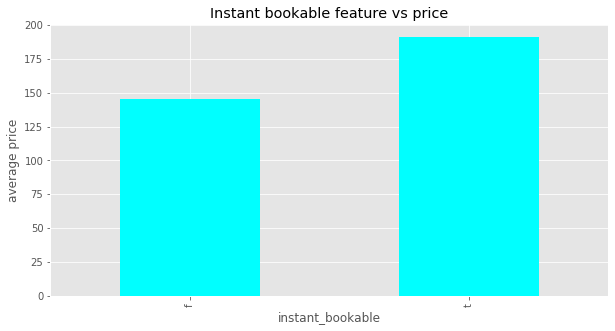

In [75]:
ax = inst_price.plot.bar(figsize = (10,5), colormap = "cool")

ax.set_ylabel("average price")

ax.set_title("Instant bookable feature vs price")

In [76]:
#Question 3

## Question 3. Which room type costs more ?

Text(0.5, 1.0, 'Room type vs price')

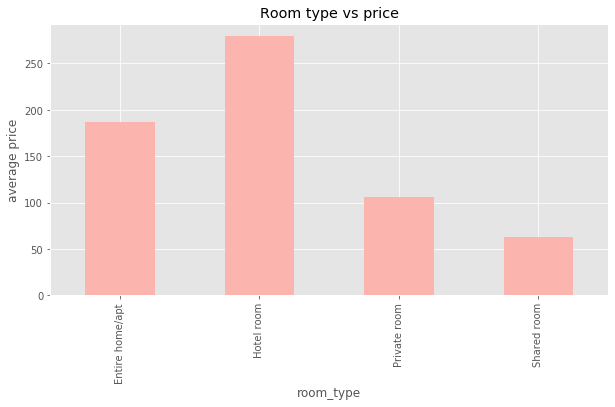

In [77]:
roomtype_price = listings_full.groupby(listings_full['room_type'])['price'].mean()

ax = roomtype_price.plot.bar(figsize = (10,5), colormap = "Pastel1")

ax.set_ylabel("average price")

ax.set_title("Room type vs price")

In [78]:
#Answer 3

*Answer 3. hotel room costs more, next is entire home/apartment and next is private room.AMong all shared room costs low* 

In [79]:
#Additional question.

## Question . How average price varies with reviews ?

In [80]:
price_score = listings_full.groupby(listings_full['review_scores_value'])['price'].mean()

In [81]:
price_data = price_score.to_frame()

price_data.reset_index(level= price_data.index.names, inplace=True)

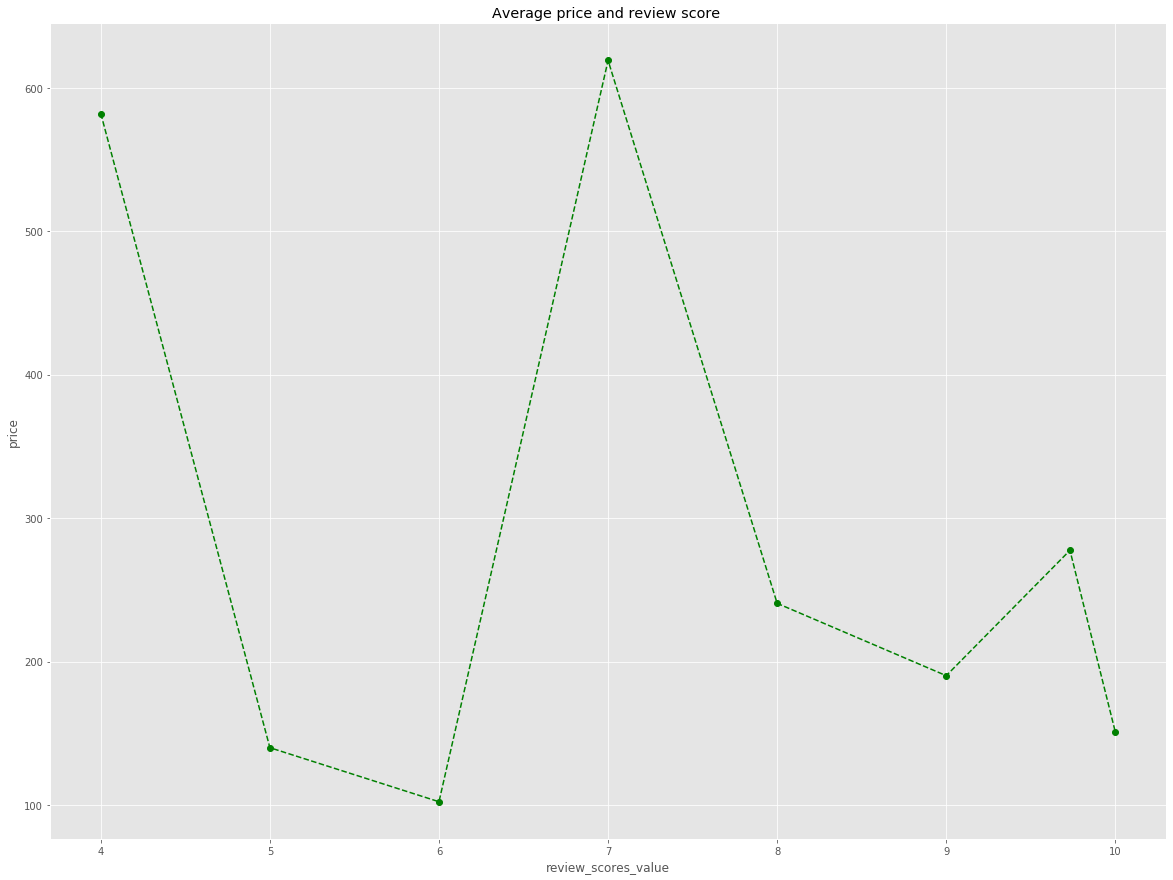

In [82]:
fig, ax = plt.subplots(figsize = (20,15))

ax.plot(price_data["review_scores_value"], price_data["price"], marker = 'o', linestyle = '--', color = 'g')

ax.set_xlabel("review_scores_value")

ax.set_ylabel("price")

ax.set_title("Average price and review score ")

plt.show()

In [83]:
#Answer.

*Answer . Rooms with review score of 7 has high average price while review score of 6 has low price.*